# Lab 6 - Spotify

Kalyn Howes & Chloe VanCory

COSC 311

12/10/21

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import random
import sklearn
import shap
import copy
import tqdm
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [2]:
def divideSets(p,data):
    copydata = copy.deepcopy(data)
    # print(copydata)
    np.random.shuffle(copydata)
    list1 = copydata[:int(p*len(copydata))]
    list2 = copydata[int(p*len(copydata)):]
    #print('List 1: \n', list1)
    #print('\nList 2: \n',list2)
    
    return (list1, list2)

# 3) Spotify Data

In [13]:
songs = pd.read_csv('Data/Spotify.csv', header=0)
# songs.head(200)
# songs.info()

# changing streams from strings to ints
songs['Streams'][songs['Streams'] == ' '] = 0
songs['Streams'] = np.array([int(s.replace(',','')) for s in songs['Streams'].values])
# songs[songs['Number of Times Charted'] == ''] = 0

songs.convert_dtypes()

# make sure none of these entries are blank first!
songs['Artist Followers'][songs['Artist Followers'] == ' '] = 0
songs['Artist Followers'][songs['Artist Followers'] == ''] = 0
songs['Artist Followers'].astype(int)

T = 4 # for an even split

songs['Artist Followers'] = songs['Artist Followers'].astype('float64')
songs['Number of Times Charted'] = songs['Number of Times Charted'].astype('float64')

# (songs['Number of Times Charted'] == 1).sum()
songs['Number of Times Charted'][songs['Number of Times Charted'] <= T] = 0
songs['Number of Times Charted'][songs['Number of Times Charted'] > T] = 1


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

#### a) Train a model from the scikit-learn library on the data 
(e.g. support vector machine, tree classifier, multilayer perceptron). That is, your goal for the iris dataset is a multi-class decision of the iris species

array([ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
       -1.,  0.,  0., -1., -1.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  1.,
        0., -1., -1.,  1.,  0.,  0., -1., -1., -1.,  1.,  0.,  0.,  1.,
        0.,  0.,  0., -1., -1.,  0.,  0.,  0.,  0., -1., -1.,  1.,  1.,
       -1.,  0., -1.,  1.,  0.,  1.,  0.,  1.,  0., -1.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0., -1.,
       -1.,  0.,  0.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0., -1.,  0., -1.,  0.,  0., -1.,  0.,  0.,  0.,  0.,
        1.,  0.,  0., -1.,  0.,  0., -1.,  0., -1.,  1.,  0.,  0.,  1.,
        0., -1.,  0.,  0.,  1.,  0.,  0., -1.,  0.,  0.,  0., -1.,  0.,
        0., -1.,  0., -1.,  0.,  0.,  1., -1.,  0.,  0., -1.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0., -1.,  0., -1.,  0.,  0.,  1.,  0.,  1.,  1.,
        1.,  0.,  0., -1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0

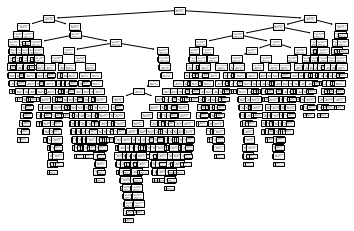

In [4]:
from sklearn import tree

songs = songs.sample(frac = 1)

x = songs[['Streams','Artist Followers']].values.astype('float64')
y = songs['Number of Times Charted'].values

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x[:1200], y[:1200]) # fittig on 1200 points of the data
p = tree.plot_tree(clf)

yhat = clf.predict(x[1200:]) # predicting last 300ish

y[1200:] - yhat

In [15]:
# check accuracy with predictions & do a confusion matrix

# testing on already classified point: 48,633,449 streams, 3377762 artist followers -> should be 8 times charted -> 1
clf.predict([[48633449, 3377762]])

array([1.])

#### (b) Using the shap package, plot the waterfall graph of SHAP values of the features in your data. 
Do this for a couple different predictions, how do they differ for different class outputs? Try for both a correct and incorrect prediction.

In [6]:
xs = songs[['Streams', 'Artist Followers']].values.astype('float64')
# xs = songs[['Streams']].values.astype('float64')
ys = songs['Number of Times Charted'].astype('float64')

# probably a better idea to split the data etc.
clf.fit(xs,ys)

explainer = shap.Explainer(clf.predict, xs, feature_names=['Streams', 'Artist Followers']) # pass in the predict method and the data to use
shap_values = explainer(xs)

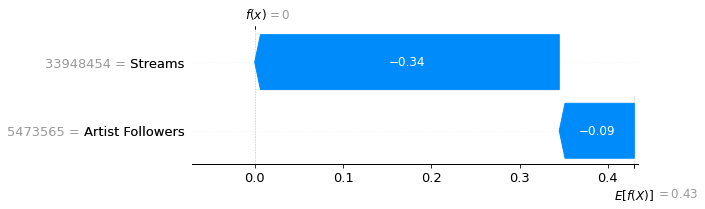

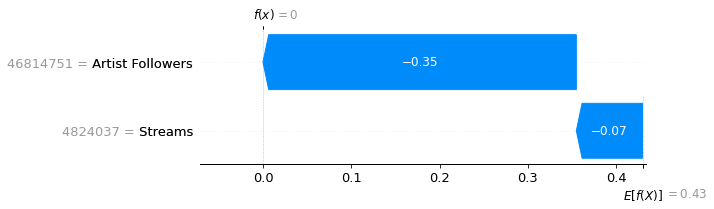

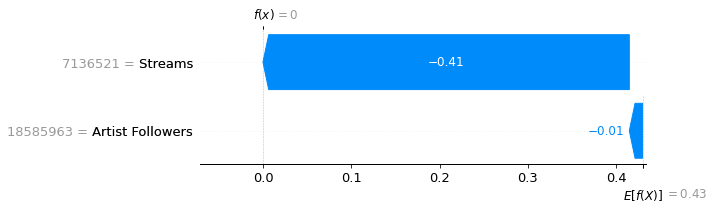

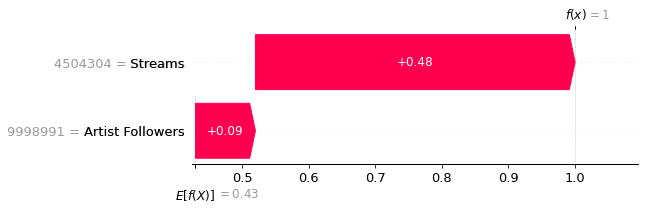

In [7]:
# check for different shap values: shap_values[1], [10] etc
#print(shap_values)
shap.plots.waterfall(shap_values[0])
shap.plots.waterfall(shap_values[5])
shap.plots.waterfall(shap_values[10])
shap.plots.waterfall(shap_values[20])

It seems the streams influence the number of times a song charts more than the artists followers.

#### (c) Try the force plot on some individual SHAP values and also the entire set of predictions. 
What do these indicate about the influence of various features in your data?

In [8]:
# individual shap values:
shap.initjs()
shap.plots.force(shap_values[0].base_values, shap_values[0].values, shap_values[0].data)
# shap.plots.force(shap_values)

In [9]:
shap.plots.force(shap_values)

Here it seems the two features are more even, but streams still influence the decision more.

#### (d) Try the above with a second model and compare and contrast the results.
(try a new machine learning model & do it again)

If you were to use one of these in a practical setting (i.e. your job/income/business depends on it), which would you choose and why?

In [20]:
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
x = songs[['Streams','Artist Followers']].values
y = songs['Number of Times Charted'].values
#x = songs[['Streams']].values
clf2 = MLPRegressor(random_state=1, max_iter=500)

clf2.fit(x, y)
# clf2.predict([[48633449, 3377762]]) # should be 8

MLPRegressor(max_iter=500, random_state=1)

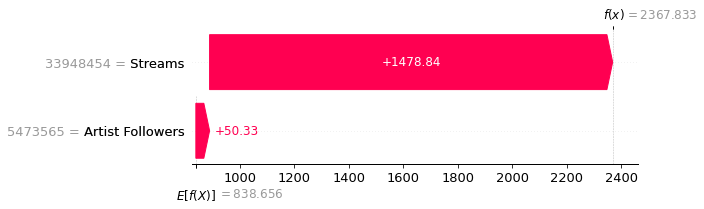

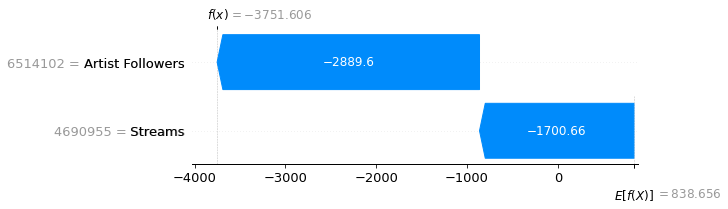

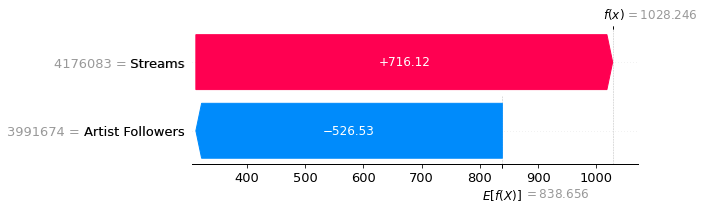

In [26]:
clf2.fit(xs,ys)

explainer = shap.Explainer(clf2.predict, xs, feature_names=['Streams', 'Artist Followers']) # pass in the predict method and the data to use
shap_values2 = explainer(xs)
#print(shap_value2s[0])

# check for different shap values: shap_values[1], [10] etc
shap.plots.waterfall(shap_values2[0])
shap.plots.waterfall(shap_values2[100])
shap.plots.waterfall(shap_values2[140])

Both features are present in these waterfall charts, streams seem to slightly differ more.

In [27]:
shap.plots.force(shap_values2)

Here in the force chart it seems both features have a decent impact. I would choose the decision tree because I understand them better and theyre cool.